# Parkinson's disease Prediction (Brain Images)
## Author: Hariket Sukesh Kumar Sheth (20BCE1975)
## Course: Data Visualization (CSE3020)
## Faculty: Dr. Joshan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import *

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.utils import shuffle
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB3,EfficientNetB2,EfficientNetB1,EfficientNetB7,EfficientNetB0,Xception
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

__<h2>pathlib can easily extract your directory</h2>__

* Make data frame columns:
    + image_link
    + image_Names
    + image_Labels
* Concat and make Dataframe:
    + df1

In [ ]:
img_path=Path('/content/drive/MyDrive/alzheimer-parkinson-disease')
image_link=list(img_path.glob(r'**/*.*')) # image link
image_Names=[x.parents[0].stem for x in image_link] #labels name
df=pd.DataFrame(list(zip(image_link,image_Names)),columns=['Link','Name'])



*   Mounting Google Drive and loading the dataset
*   Dataset comprises of 3 class and 4 class 
*   Each have labels of AD, CONTROL_AD, PD, CONTROL_PD
*   Completely Image Based Dataset with more than 15560 images



In [ ]:
np.unique(df.Name) # need to drop "Control" bcz of 'CONTROL_AD' & 'CONTROL_PD'

array(['AD', 'CONTROL', 'CONTROL_AD', 'CONTROL_PD', 'PD'], dtype=object)

In [ ]:
df=df[df.Name!="CONTROL"] # drop "Control"
df['Labels']=preprocessing.LabelEncoder().fit_transform(df.Name) # create image name labels

<ipython-input-5-9cb6c742fd98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels']=preprocessing.LabelEncoder().fit_transform(df.Name) # create image name labels


**Removing Control because it affects the accuracy by a margin of 20-30%**

In [ ]:
np.unique(df.Labels) #After data set

array([0, 1, 2, 3])

<h1>Plot</h1>

<Axes: >

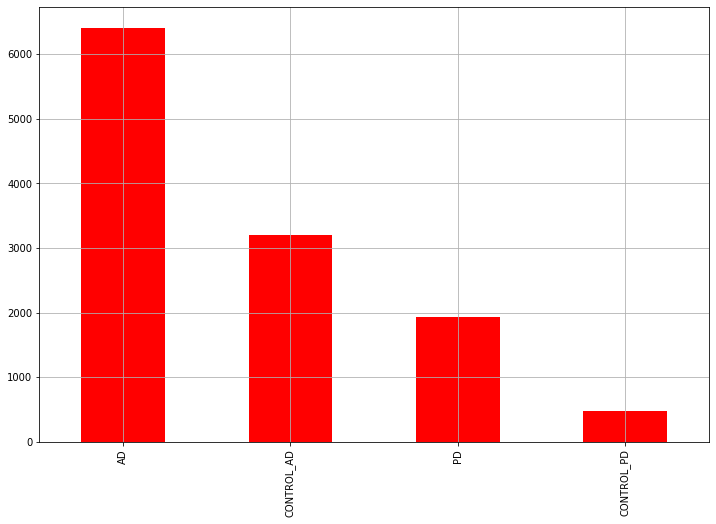

In [ ]:
df['Name'].value_counts().plot(kind='bar',figsize = (12,8), grid = True,color = 'red')

* <h2>Split labels,class and tarin,test:</h2>
+    <h3>train Data </h3>
+   <h3>test data</h3>

In [ ]:
x=df.Link
y=df.Labels
x_data,y_data=shuffle(x,y,random_state=42) #data shuffle for better result
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x_data, y_data, test_size=0.1, random_state=42)

<h2>Train and Test image to data format:</h2>

In [ ]:
imsize=150
X_train=[]
X_test=[]
for i in xtrain:
    # for train
    img_pre=cv2.imread(str(i))
    img_pre=cv2.resize(img_pre, (imsize,imsize))
    X_train.append(img_pre)
    
    
for j in xtest:
    # for test
    img_pre1=cv2.imread(str(j))
    img_pre1=cv2.resize(img_pre1, (imsize,imsize))
    X_test.append(img_pre1)
    
    
X_train=np.array(X_train)
X_test=np.array(X_test)
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

__<h2>Create model with EfficientNetB7 </h2>__

In [ ]:
efficient = EfficientNetB7(weights='imagenet',include_top = False, input_shape=(imsize, imsize, 3))

model = efficient.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(0.5)(model)
model = tf.keras.layers.Dense(4, activation = "softmax")(model)
model = tf.keras.models.Model(inputs = efficient.input , outputs = model)

model.compile(loss = 'categorical_crossentropy', 
             optimizer = "Adam", 
              metrics=["accuracy"]
             )

tensorboard = TensorBoard(log_dir="logs")
checkpoint = ModelCheckpoint("efficientB7.h5", 
                            monitor='val_accuracy', 
                            mode = "auto", 
                            verbose = 1,
                            save_best_only =True)
reduce_LR = ReduceLROnPlateau(monitor="val_accuracy", 
                             factor = 0.3, 
                             patience = 2, 
                             min_delta=0.001, 
                             mode = "auto", 
                            verbose = 1)

258076736/258076736 [==============================] - 2s 0us/step


__<h2>Fit model with EfficientNetB7 </h2>__

In [ ]:
history = model.fit(X_train, ytrain,
                  validation_data =(X_test,ytest), 
                  epochs = 15, 
                  verbose =1, 
                  batch_size = 32, 
                  callbacks = [tensorboard, checkpoint, reduce_LR])

__<h2>For data frame loss and accuracy</h2>__

* Make data frame for df_accuracy:
    + loss
    + accuracy
    + val_loss
    + val_accuracy


In [ ]:
df_accuracy=pd.DataFrame()
df_accuracy['Loss']=history.history['loss']
df_accuracy['Value Loss']=history.history['val_loss']
df_accuracy['Accuracy']=history.history['accuracy']
df_accuracy['Value Accuracy']=history.history['val_accuracy']

df_accuracy

__<h2>Plot for best performance with EfficientNetB7 </h2>__

In [ ]:
df_accuracy.sort_values('Loss',ascending=False).head(1).plot(kind='bar',figsize = (12,8))

__<h2>Visualization for accuracy</h2>__

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(history)

__<h2>Visualization for loss</h2>__

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("epoch")
    plt.legend(["loss", "value Loss"], loc="upper left")
    plt.show()


plot_hist(history)